In [46]:
import re
import darklyrics
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import TweetTokenizer
from string import punctuation

In [47]:
# Fazer download das stopwords
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /home/ph/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ph/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Informe na variável artist o nome da banda que deseja estudar

Visite o site http://www.darklyrics.com/ para ver a lista das bandas disponíveis

In [3]:
artist = "iron maiden"

## Retorna os álbuns da banda

In [4]:
try:
    albuns = darklyrics.get_albums(artist)

except IndexError:
    raise IndexError("Artista não encontrado")

In [5]:
print(f"{artist} tem {len(albuns)} discos encontrados")

iron maiden tem 28 discos encontrados


### Retorne o nome das músicas

In [99]:
songs = darklyrics.get_songs(artist)

In [100]:
print(f"{artist} tem {len(songs)} músicas encontradas")

iron maiden tem 208 músicas encontradas


### Remove nome de músicas duplicadas

In [101]:
songs = set(songs)

In [102]:
print(f"{artist} tem {len(songs)} músicas distintas encontradas")

iron maiden tem 197 músicas distintas encontradas


### Retorna todas músicas da banda

In [6]:
lyrics = darklyrics.get_all_lyrics(artist)

In [7]:
print(f"{artist} tem a quantidade de {len(lyrics)} letras nas músicas encontradas")

iron maiden tem 258445 palavras nas letras encontradas


In [105]:
lyrics[:100]

"\n  [Steve Harris]\n\n Walking through the city, looking oh so pretty,\n I've just got to find my way.\n "

In [8]:
lyrics = lyrics.replace("\n\n", " ").replace("\n", " ").strip()

In [94]:
print(f"{artist} tem {len(lyrics)} letras distintas encontradas")

slayer tem 165722 letras distintas encontradas


## Criar uma nuvem de palavras

Seleciona as palavras mais repetidas e cria uma nuvem de palavras

In [48]:
stop_words = set(nltk.corpus.stopwords.words('english') + list(punctuation))
stop_words.add('-')

In [40]:
def get_tokens_from_text(text: str, keep_punkt=True):
    if keep_punkt:
        return nltk.word_tokenize(text)
    else:
        tk = TweetTokenizer()
        return tk.tokenize(text)

In [55]:
def get_top_most_words(top=10):
    words = []
    
    for val in lyrics.split():
        if val.lower() not in stop_words:
            words.append(val)
    
    group_by_word = Counter(words)
    
    return group_by_word.most_common(top)
    

In [56]:
# informe o valor do parâmetro top na function get_top_most_words para indicar a quantidade de palavras que quer retornar

most_common = get_top_most_words(top=20)

In [57]:
print(most_common)

[("I'm", 237), ('know', 225), ('time', 195), ('see', 152), ('look', 152), ('got', 132), ('life', 127), ('one', 126), ('like', 112), ('tell', 110), ("I've", 107), ('way', 104), ('gonna', 102), ('go', 101), ('live', 100), ('take', 98), ('away', 98), ('feel', 95), ('eyes', 95), ('world', 94)]


In [58]:
def create_word_cloud(words: tuple):
    lyric_words = ""
    
    for val in words:
        val = str(val[0]) 
  
        # split the value
        tokens = val.split() 
      
        # converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
      
        lyric_words += " ".join(tokens)+" "
        
    # gets color of the image
    custom_image = np.array(Image.open("resources/cloud.png"))

    # creates wordcloud
    wordcloud = WordCloud(
        background_color ='white', 
        stopwords = stop_words, 
        mask = custom_image).generate(lyric_words)
    
     # displays the wordcloud
    plt.imshow(wordcloud, interpolation = 'bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0)   
    plt.show()

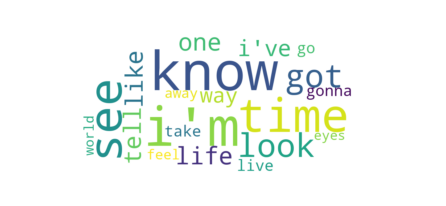

In [59]:
create_word_cloud(most_common)

In [60]:
df = pd.DataFrame(most_common, columns=['word', 'total'])

In [61]:
df.head(20)

,word,total
0,I'm,237
1,know,225
2,time,195
3,see,152
4,look,152
5,got,132
6,life,127
7,one,126
8,like,112
9,tell,110


In [62]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

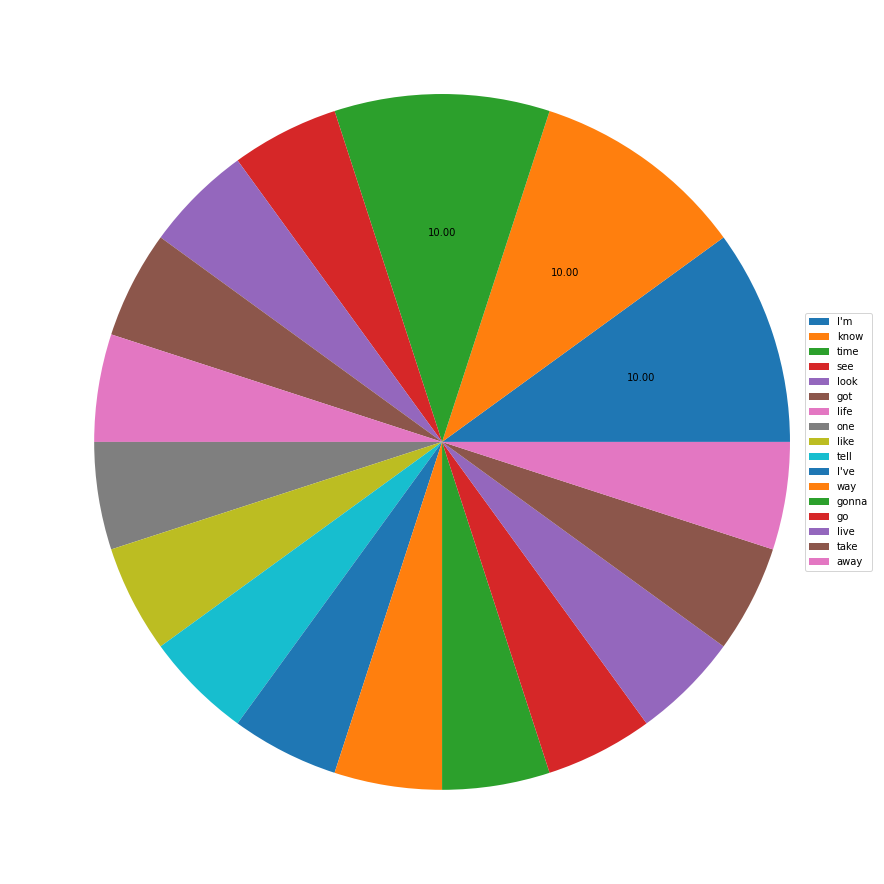

In [63]:
%matplotlib inline

my_labels = [d[0] for d in most_common]

ax = df['total'].value_counts().plot(kind='pie', figsize=(30,16), autopct=autopct, labels=None)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

## Contando as frases que mais se repetem nas letras das músicas

In [49]:
phrase_counter = Counter()
texto = ''
non_speaker = re.compile('[A-Za-z]+: (.*)')
length = 3    # quantidade de palavras na frase

for sent in nltk.sent_tokenize(lyrics):
    strip_speaker = non_speaker.match(sent)

    if strip_speaker is not None:
        sent = strip_speaker.group(1)
    words = get_tokens_from_text(sent, False)

    for phrase in ngrams(words, length):
        if all(word not in stop_words for word in phrase):
            phrase_counter[phrase] += 1
            
most_common_phrases = phrase_counter.most_common(10)

for k,v in most_common_phrases:
    print (' '.join(k))

brave new world
We're blood brothers
we're blood brothers
stranger Don't look
I'm running free
When two worlds
two worlds collide
No point asking
come Your time
blood brothers We're


## Brincando com o NLTK Frequency Distribution

In [ ]:
from nltk import FreqDist

# Apply a list of tokens to the FreqDist object
lyric_freqdist = FreqDist(get_tokens_from_text(lyrics, False))

# View the most frequent tokens and corresponding counts in descending order
lyric_freqdist.most_common()

# Normalize the frequency by dividing each word's frequency by the total number
# of words in the corpus

# Obtain a total word count in the corpus
total_word_count = sum(lyric_freqdist.values())

# View the top 25 words by normalize frequency distribution
lyric_top_25 = lyric_freqdist.most_common(25)

print("Word\t\t\tNormalized Frequency")
for word in lyric_top_25:
    normalized_frequency = word[1] / total_word_count
    print("{} \t\t\t {:.4}".format(word[0], normalized_frequency))

### Identificar quem é o membro da banda que mais escreve música

In [ ]:
text_in_brackets = re.findall(r'\[.*?\]', lyrics)
print(text_in_brackets)